<a href="https://colab.research.google.com/github/elyasncr/Projeto_ML_Americanas/blob/main/Dever_ML_Air_Flare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import  ProfileReport
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV,  RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.cm as cm
from sklearn.model_selection import learning_curve
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

## 1. Exploração do dataset

In [ ]:
df = pd.read_csv("Cleaned_dataset.csv")

In [ ]:
df

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...,...
452083,2023-03-06,Monday,Vistara,UK-926,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,13.0833,50,65028
452084,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254
452085,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254
452086,2023-03-06,Monday,Vistara,UK-946,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.1667,50,72980


In [ ]:
df.describe()

,Duration_in_hours,Days_left,Fare
count,452088.000000,452088.000000,452088.000000
mean,12.349222,25.627902,22840.100890
std,7.431478,14.300846,20307.963002
min,0.750000,1.000000,1307.000000
25%,6.583300,13.000000,8762.750000
50%,11.333300,26.000000,13407.000000
75%,16.500000,38.000000,35587.000000
max,43.583300,50.000000,143019.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    452088 non-null  object 
 1   Journey_day        452088 non-null  object 
 2   Airline            452088 non-null  object 
 3   Flight_code        452088 non-null  object 
 4   Class              452088 non-null  object 
 5   Source             452088 non-null  object 
 6   Departure          452088 non-null  object 
 7   Total_stops        452088 non-null  object 
 8   Arrival            452088 non-null  object 
 9   Destination        452088 non-null  object 
 10  Duration_in_hours  452088 non-null  float64
 11  Days_left          452088 non-null  int64  
 12  Fare               452088 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 44.8+ MB


In [ ]:
df['Date_of_journey'] = pd.to_datetime(df['Date_of_journey'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_of_journey    452088 non-null  datetime64[ns]
 1   Journey_day        452088 non-null  object        
 2   Airline            452088 non-null  object        
 3   Flight_code        452088 non-null  object        
 4   Class              452088 non-null  object        
 5   Source             452088 non-null  object        
 6   Departure          452088 non-null  object        
 7   Total_stops        452088 non-null  object        
 8   Arrival            452088 non-null  object        
 9   Destination        452088 non-null  object        
 10  Duration_in_hours  452088 non-null  float64       
 11  Days_left          452088 non-null  int64         
 12  Fare               452088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), 

In [ ]:
data_recente = df['Date_of_journey'].max()
data_inicial = df['Date_of_journey'].min()

print(f'Intervalo de tempo do dataset: {data_inicial} : {data_recente}')

Intervalo de tempo do dataset: 2023-01-16 00:00:00 : 2023-03-06 00:00:00


In [ ]:
profile = ProfileReport(df)

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##2. Análise das features

In [ ]:
#Maiores ocorrências 
df.groupby(['Source','Destination'])['Source'].count().nlargest(5)

Source     Destination
Delhi      Mumbai         19113
           Bangalore      17636
Bangalore  Delhi          17576
Mumbai     Delhi          16588
Bangalore  Mumbai         16497
Name: Source, dtype: int64

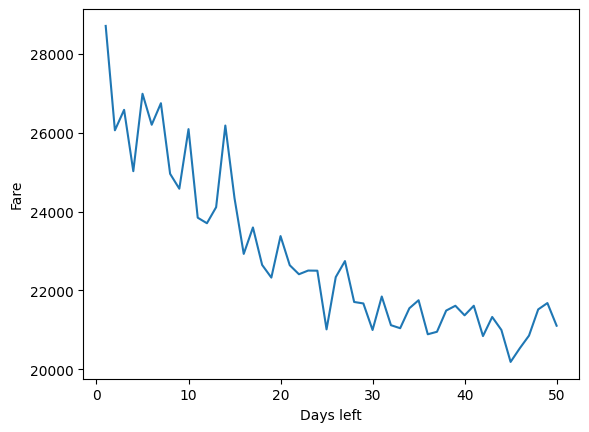

In [ ]:
#Relação Dias comprados antes x tarifa média
daily_fares = df.groupby('Days_left')['Fare'].mean()
plt.plot(daily_fares.index, daily_fares.values)
plt.xlabel('Days left')
plt.ylabel('Fare')
plt.show()

É possível notar que existe uma relação inversa entre a quantidade de dias e o preço da passagem

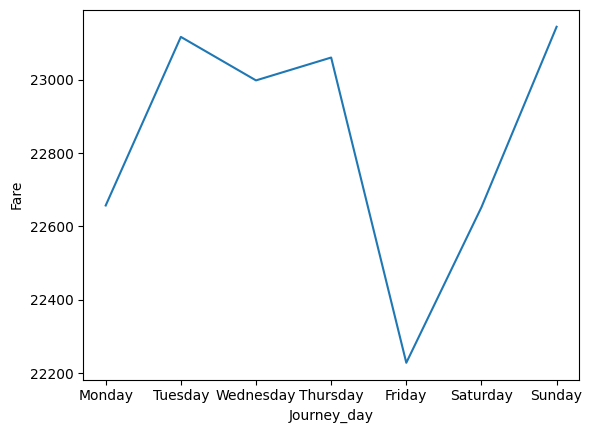

In [ ]:
#Relação entre dia da semana da compra e Tarifa média
daily_fares = df.groupby('Journey_day')['Fare'].mean()
plt.plot(daily_fares.index, daily_fares.values)
plt.xlabel('Journey_day')
week = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(len(week)),week)
plt.ylabel('Fare')
plt.show()

In [ ]:
df['month_of_journey'] = df['Date_of_journey'].dt.month

In [ ]:
df['month_of_journey'].unique()

array([1, 2, 3])

In [ ]:
df.groupby(['month_of_journey'])['month_of_journey'].count()

month_of_journey
1    142391
2    255585
3     54112
Name: month_of_journey, dtype: int64

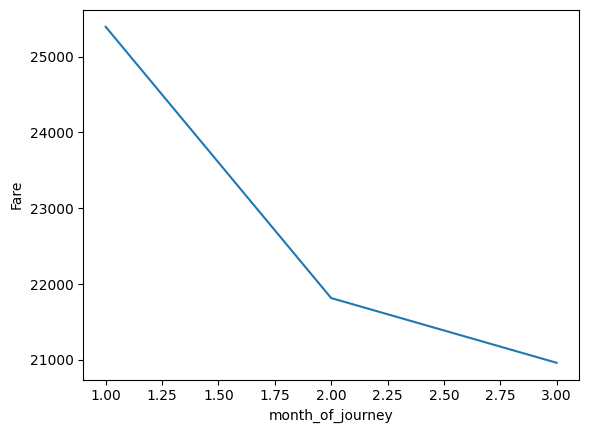

In [ ]:
Month_fares = df.groupby('month_of_journey')['Fare'].mean()
plt.plot(Month_fares.index, Month_fares.values)
plt.xlabel('month_of_journey')
plt.ylabel('Fare')
plt.show()

## 3. Pré-processamento do dataset

1. Gerar um dataset filtrado com as maiores ocorrências entre origem e destino
1. Converter a Feature de mês para categórico
2. Eliminar duplicadas para evitar ter mesma linha em treino e teste
2. Eliminar Date_of_journey do modelo já que day of joarney e month of joarney traz mais informação para o modelo.
3. Retirar Flight Code pois não é muito determinante para o modelo, pois possui muitos valores categóricos possíveis.


Necessário transformar em uma coluna categórica month_of_journey

In [ ]:
df.shape

(452088, 14)

In [ ]:
 #deixando o dataframe reduzido, devido o tempo e complexidade do dataset
df = df.loc[(df['Source'] == 'Delhi') & (df['Destination'] == 'Mumbai')]

In [ ]:
# modelo de ML não processa dados NA
df = df.dropna() 

#gerando coluna de mês
df['month_of_journey'] = df['month_of_journey'].astype(str) 

#feature categórica com muitos valores
df = df.drop(columns=['Flight_code']) 

#eliminar a redundância
df = df.drop(columns=['Date_of_journey'])

#Eliminando linhas duplicadas 
df = df.drop_duplicates() 

In [ ]:
df.shape

(18528, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18528 entries, 0 to 19112
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Journey_day        18528 non-null  object 
 1   Airline            18528 non-null  object 
 2   Class              18528 non-null  object 
 3   Source             18528 non-null  object 
 4   Departure          18528 non-null  object 
 5   Total_stops        18528 non-null  object 
 6   Arrival            18528 non-null  object 
 7   Destination        18528 non-null  object 
 8   Duration_in_hours  18528 non-null  float64
 9   Days_left          18528 non-null  int64  
 10  Fare               18528 non-null  int64  
 11  month_of_journey   18528 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.8+ MB


## 4.Modelagem

### 4.1 Pré processamento

In [ ]:
X = df.drop(columns=['Fare', 'Source', 'Destination'])
y = df['Fare']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Journey_day,Airline,Class,Departure,Total_stops,Arrival,Duration_in_hours,Days_left,month_of_journey
8853,Wednesday,Air India,Economy,12 PM - 6 PM,non-stop,After 6 PM,2.4167,24,2
1842,Saturday,GO FIRST,Economy,6 AM - 12 PM,1-stop,12 PM - 6 PM,5.0000,6,1
10113,Saturday,Air India,Economy,After 6 PM,1-stop,6 AM - 12 PM,13.3333,27,2
14724,Thursday,Air India,Business,6 AM - 12 PM,1-stop,12 PM - 6 PM,7.7500,39,2
18687,Sunday,Air India,Business,6 AM - 12 PM,1-stop,After 6 PM,12.5000,49,3
...,...,...,...,...,...,...,...,...,...
11589,Wednesday,Air India,Economy,After 6 PM,non-stop,Before 6 AM,2.2500,31,2
12292,Thursday,Air India,Business,6 AM - 12 PM,1-stop,12 PM - 6 PM,7.5833,32,2
5497,Monday,Vistara,Premium Economy,6 AM - 12 PM,non-stop,12 PM - 6 PM,2.2500,15,1
886,Wednesday,Vistara,Economy,6 AM - 12 PM,1-stop,After 6 PM,14.2500,3,1


In [ ]:
# Definindo a variáveis categóricas e numericas
features_num = X_train.select_dtypes(include=np.number).columns.tolist()
features_cat = X_train.select_dtypes(exclude=np.number).columns.tolist()
print(f'Fetures Categoricas:{features_cat}')
print(f'Features Numéricas: {features_num}')

Fetures Categoricas:['Journey_day', 'Airline', 'Class', 'Departure', 'Total_stops', 'Arrival', 'month_of_journey']
Features Numéricas: ['Duration_in_hours', 'Days_left']


### 4.2 Avaliação de modelos

 Regressão Linear, SVM, Random Forest Regressor

In [ ]:
ct = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), features_cat), 
        ('scaler', StandardScaler(), features_num)
    ])
X_train = ct.fit_transform(X_train)
X_test = ct.fit_transform(X_test)

<ipython-input-28-efb5fef8e83a>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')
<ipython-input-28-efb5fef8e83a>:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test, linear_pred, c='red', cmap=cmap)
<ipython-input-28-efb5fef8e83a>:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test, svm_pred, c='blue', cmap=cmap)
<ipython-input-28-efb5fef8e83a>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test, Tree_pred, c='green', cmap=cmap)


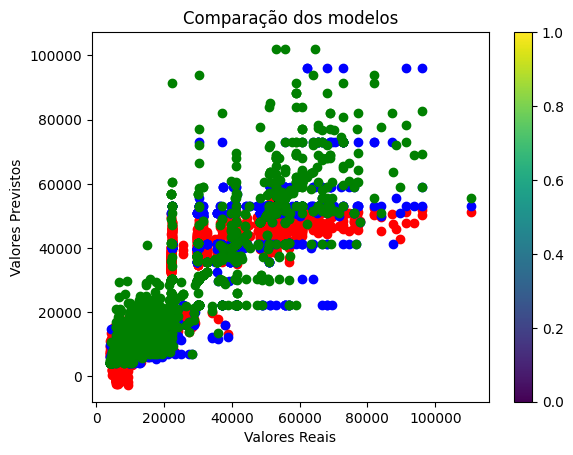

R2 Score para Linear Regression: 0.820
R2 Score para SVM Regression: 0.864
R2 Score para Decision Tree Regression: 0.879


In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

svm_model = SVC()
svm_model.fit(X_train, y_train)

Tree_model = DecisionTreeRegressor()
Tree_model.fit(X_train, y_train)

# Avaliando os modelos
linear_pred = linear_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
Tree_pred = Tree_model.predict(X_test)

linear_r2 = r2_score(y_test, linear_pred)
svm_r2 = r2_score(y_test, svm_pred)
Tree_r2 = r2_score(y_test, Tree_pred)

# Plotando os resultados com cmap
cmap = cm.get_cmap('viridis')

plt.scatter(y_test, linear_pred, c='red', cmap=cmap)
plt.scatter(y_test, svm_pred, c='blue', cmap=cmap)
plt.scatter(y_test, Tree_pred, c='green', cmap=cmap)

plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação dos modelos')
plt.colorbar()
plt.show();

# Imprimindo os resultados de r2_score
print("R2 Score para Linear Regression: {:.3f}".format(linear_r2))
print("R2 Score para SVM Regression: {:.3f}".format(svm_r2))
print("R2 Score para Decision Tree Regression: {:.3f}".format(Tree_r2))

Modelo escolhido foi Decision Tree Regression

### 4.3 Pipeline

In [ ]:
# Criando o pré-processador
pre_processador = ColumnTransformer([
    ('scaler', StandardScaler(), features_num),
    ('onehot', OneHotEncoder(drop='first'), features_cat)
])

# Criando a pipeline completa
pipe_final = Pipeline([
    ('pre_processamento', pre_processador),
    ('model', DecisionTreeRegressor(random_state=42))
])

In [ ]:
pipe_final

Pipeline(steps=[('pre_processamento',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Duration_in_hours',
                                                   'Days_left']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Journey_day', 'Airline',
                                                   'Class', 'Departure',
                                                   'Total_stops', 'Arrival',
                                                   'month_of_journey'])])),
                ('model', DecisionTreeRegressor(random_state=42))])

In [ ]:
pipe_final.fit(X_train, y_train)

Pipeline(steps=[('pre_processamento',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Duration_in_hours',
                                                   'Days_left']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Journey_day', 'Airline',
                                                   'Class', 'Departure',
                                                   'Total_stops', 'Arrival',
                                                   'month_of_journey'])])),
                ('model', DecisionTreeRegressor(random_state=42))])

In [ ]:
pipe_final.score(X_test, y_test)

0.9127679595826039

In [ ]:
#Fazendo predição
y_pred = pipe_final.predict(X_test)

### 4.5 Otimização de hiperparâmetro

In [ ]:
#parâmetros que vão ser testados
param_grid = {
    'model__criterion': ['squared_error', 'absolute_error', 'poisson'],
    'model__max_features': [5, 7, 9, 10],
    'model__max_depth': [None, 2, 3, 4, 5],
}

In [ ]:
grid_search = GridSearchCV(pipe_final, param_grid, cv=5, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre_processamento',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         ['Duration_in_hours',
                                                                          'Days_left']),
                                                                        ('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Journey_day',
                                                                          'Airline',
                                                                          'Class',
                                                                          'Departure',
                                                                          'Total_stops',
                                                                          'Arrival',
                                                                          'month_of_journey'])])),
                                       ('model',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__criterion': ['squared_error', 'absolute_error',
                                              'poisson'],
                         'model__max_depth': [None, 2, 3, 4, 5],
                         'model__max_features': [5, 7, 9, 10]})

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('pre_processamento',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Duration_in_hours',
                                                   'Days_left']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Journey_day', 'Airline',
                                                   'Class', 'Departure',
                                                   'Total_stops', 'Arrival',
                                                   'month_of_journey'])])),
                ('model',
                 DecisionTreeRegressor(criterion='poisson', max_features=9,
                                       random_state=42))])

In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

0.8814731074466652

### 4.3 Verficar overfitting

In [ ]:
y_pred_train = grid_search.predict(X_train)

In [ ]:
r2_score(y_train, y_pred_train)

0.9970036230215269

Avaliamos a Diferença da predição do modelo nos dados y_train (0.9970036230215269) e y_test ()




### 4.6 Avaliação do modelo

In [ ]:
# Calculando as métricas
mae = mean_absolute_error( y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#add MAPE

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 2877.151331174671
MSE: 38059177.66154735
RMSE: 6169.212077854622
R²: 0.8814731074466652


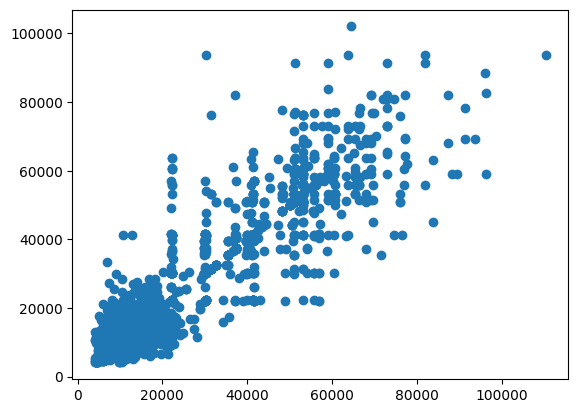

In [ ]:
plt.scatter(y_test,y_pred)

### 5. Respostas

Qual técnica foi aplicada?